In [5]:
import os
import sys
import json
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

with open("results_enemy1_2_3.json") as f:
    results = json.load(f)

with open("neat_results_1_2_3.json") as f:
    results_neat = json.load(f)

In [6]:
best_runs = {str(enemy):{str(run):[] for run in range(10)} for enemy in range(1, 4)}
best_runs_neat = {str(enemy):{str(run):[] for run in range(10)} for enemy in range(1, 4)}

for enemy in results:
    for run in results[enemy]:
        for i in range(5):
            best_runs[enemy][run].append(max(results[enemy][run]["maximums"]))

for enemy in results_neat:
    for run in results_neat[enemy]:
        for i in range(5):
            best_runs_neat[enemy][run].append(max(results_neat[enemy][run]["maximums"]))

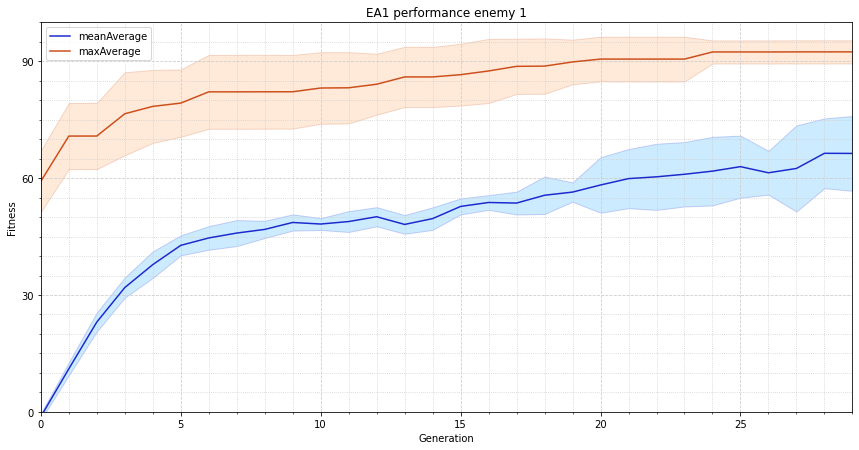

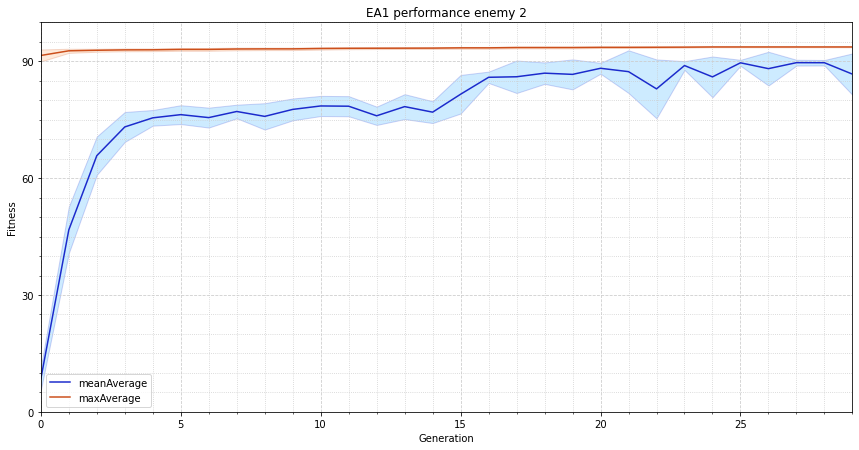

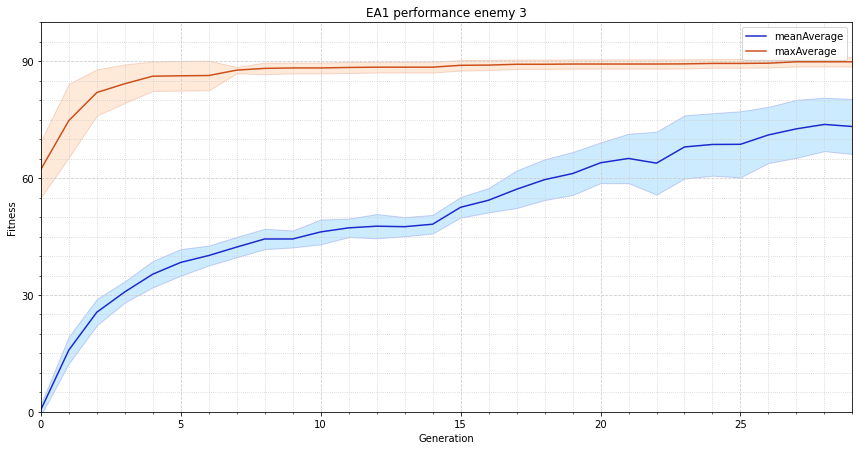

In [32]:
# parameters
x_as_len = 30 # used for smoothing
n_experiments = 30

def smooth(listX, old_x_as, new_x_as): 
    # from 10 points to 100 then old is the list of size 10 and new the list of size 100
    listX = make_interp_spline(old_x_as, listX, k=2)  # type: BSpline
    listX = listX(new_x_as)
    return listX
x_new = np.linspace(0, n_experiments-1, x_as_len)
x_old = np.linspace(0, n_experiments-1, 30)


for en, runs in results.items():
    means = []
    maximums = []
    for run, values in runs.items():
        means.append(values['means'])
        maximums.append(values['maximums'])
        
    meanAverage = np.mean(means, axis=0)
    stdMean = np.std(means, axis=0)

    maxAverage = np.mean(maximums, axis=0)
    stdMax =  np.std(maximums, axis=0)

    if len(meanAverage) < 30:
        break

    meanAverage = smooth(meanAverage,x_old,x_new)
    maxAverage = smooth(maxAverage,x_old,x_new)
    stdMean = smooth(stdMean,x_old,x_new)
    stdMax = smooth(stdMax,x_old,x_new)

    figure, ax = plt.subplots(figsize=(12, 6))
    
#     plt.figure(figsize=(12, 6), dpi=270)
    plt.tight_layout()    
    plt.plot(x_new, meanAverage, label='meanAverage', color='#1B2ACC')    
    plt.fill_between(np.linspace(0, n_experiments-1, x_as_len), 
                     meanAverage-stdMean, meanAverage+stdMean, 
                     alpha=.2, edgecolor='#1B2ACC', facecolor='#089FFF')

    plt.plot(x_new, maxAverage, label='maxAverage', color='#CC4F1B')
    plt.fill_between(np.linspace(0, n_experiments-1, x_as_len),
                     maxAverage-stdMax, maxAverage+stdMax,
                     alpha=.2, edgecolor='#CC4F1B', facecolor='#FF9848')
    
    
    plt.xlim(0, 29)
    plt.ylim(0, 100)

    
    # Change major ticks to show every 20.
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_locator(MultipleLocator(30))

    # Change minor ticks to show every 5. (20/4 = 5)
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(6))

    plt.grid(which='major', color='#CCCCCC', linestyle='--')
    plt.grid(which='minor', color='#CCCCCC', linestyle=':')
    

#     plt.xticks(x_new)
#     plt.yticks(np.linspace(0, 100, 15))
    
    plt.title(f'EA1 performance enemy {en}')
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.legend()
    plt.savefig(f'EA1-enemy{en}', bbox_inches='tight')
    plt.show()

In [7]:
df = pd.DataFrame(best_runs)
for i in range(1,4):
    df[str(i)] =  [np.mean(x) for x in df[str(i)].values]
df['method'] = 'EA1'
df

,1,2,3,method
0,94.023266,93.527000,91.593647,EA1
1,94.023266,93.727000,91.931574,EA1
2,94.023266,93.727000,89.593424,EA1
3,86.716796,93.727000,89.015851,EA1
4,94.023266,93.527000,89.413791,EA1
5,94.023266,93.727000,89.640905,EA1
6,93.102846,93.727000,89.993424,EA1
7,94.023266,93.727000,90.445142,EA1
8,94.023266,93.835214,87.393424,EA1
9,86.299556,93.727000,89.793424,EA1


In [8]:
df2 = pd.DataFrame(best_runs_neat)
for i in range(1,4):
    df2[str(i)] =  [np.mean(x) for x in df2[str(i)].values]
df2['method'] = 'NEAT'
df2

,1,2,3,method
0,94.023266,94.789365,90.836421,NEAT
1,94.023266,94.389365,91.740877,NEAT
2,94.023266,94.589365,90.126955,NEAT
3,94.230187,94.182720,93.081106,NEAT
4,94.023266,94.389365,91.467755,NEAT
5,94.023266,94.182720,91.633853,NEAT
6,95.065526,94.682006,89.793424,NEAT
7,94.023266,94.789365,91.828738,NEAT
8,94.023266,94.670101,92.875744,NEAT
9,94.230187,94.576119,92.675744,NEAT


In [11]:
gain_dfs = pd.concat([df, df2])
for i in range(1, 4):
    fig = px.box(gain_dfs, x='method', y=str(i), 
                 labels={
                     str(i): "Individual Gain",
                 },
                   points="all", width=800, height=400)
    fig.update_layout(title_text=f'Enemy {i}', title_x=0.5)
    fig.show()